In [1]:
import pickle
import numpy as np

# Load data/qm9_test_nx.pkl
with open('data/qm9_test_nx.pkl', 'rb') as f:
    qm9_test_nx = pickle.load(f)
    
mol = qm9_test_nx[150]
print('Number of graphs in qm9_test_nx:', len(qm9_test_nx))


Number of graphs in qm9_test_nx: 13082


In [2]:
# print the node atttributes of the mol
print('Node attributes of the mol:')

# cuurently, we have 8 node attributes
print(mol.nodes(data=True))

Node attributes of the mol:
[(0, {'label': 'C', 'atomic_num': 6, 'formal_charge': 0, 'chiral_tag': rdkit.Chem.rdchem.ChiralType(0), 'hybridization': rdkit.Chem.rdchem.HybridizationType(4), 'num_explicit_hs': 0, 'is_aromatic': False}), (1, {'label': 'N', 'atomic_num': 7, 'formal_charge': 0, 'chiral_tag': rdkit.Chem.rdchem.ChiralType(0), 'hybridization': rdkit.Chem.rdchem.HybridizationType(4), 'num_explicit_hs': 0, 'is_aromatic': False}), (2, {'label': 'C', 'atomic_num': 6, 'formal_charge': 0, 'chiral_tag': rdkit.Chem.rdchem.ChiralType(0), 'hybridization': rdkit.Chem.rdchem.HybridizationType(4), 'num_explicit_hs': 0, 'is_aromatic': False}), (3, {'label': 'C', 'atomic_num': 6, 'formal_charge': 0, 'chiral_tag': rdkit.Chem.rdchem.ChiralType(0), 'hybridization': rdkit.Chem.rdchem.HybridizationType(3), 'num_explicit_hs': 0, 'is_aromatic': False}), (4, {'label': 'C', 'atomic_num': 6, 'formal_charge': 0, 'chiral_tag': rdkit.Chem.rdchem.ChiralType(0), 'hybridization': rdkit.Chem.rdchem.Hybridiza

## Derive node feature matrix 

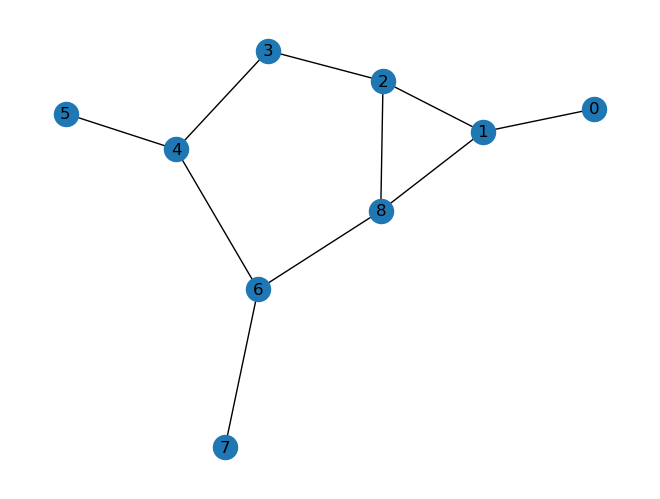

In [3]:
# visualize the graph of mol0
import networkx as nx
import matplotlib.pyplot as plt

# Draw the graph
nx.draw(mol, with_labels=True)
plt.show()

In [4]:
# extract rings from the graph
from utils.cell_lifting import *

mol_rings = get_rings(graph_to_edge_index(mol))
print('Rings of the mol:') 
print(mol_rings)

Rings of the mol:
[(2, 3, 4, 6, 8), (1, 2, 8)]


## Geting Rank-2 cells (rings) for molecules 

In [10]:
# with open('data/qm9_train_nx.pkl', 'rb') as f:
#     qm9_train = pickle.load(f)
    
# with open('data/qm9_test_nx.pkl', 'rb') as f:
#     qm9_test = pickle.load(f)

# mol_train_rings = []
# mol_test_rings = []

# # iterate qm9
# for graph in qm9_train:
#     edge_index = graph_to_edge_index(graph)
#     if edge_index.nelement() == 0:
#         mol_test_rings.append([])
#         continue
#     rings = get_rings(edge_index)
#     mol_train_rings.append(rings)

# # store in pickle
# with open('data/qm9_test_rings.pkl', 'wb') as f:
#     pickle.dump(mol_test_rings, f)

# mol_train_rings = []
# for graph in qm9_train:
#     edge_index = graph_to_edge_index(graph)
#     if edge_index.nelement() == 0:
#         mol_train_rings.append([])
#         continue
#     rings = get_rings(edge_index)
#     mol_train_rings.append(rings)

# # store in pickle
# with open('data/qm9_train_rings.pkl', 'wb') as f:
#     pickle.dump(mol_train_rings, f)

In [8]:
from tqdm import tqdm
# load qm9 dataset
with open('data/qm9_train_rings.pkl', 'rb') as f:
    qm9_rings = pickle.load(f)

mol_rings = qm9_rings[150]

qm9_rings_count = []
for rings in qm9_rings:
    qm9_rings_count.append(len(rings))

qm9_rings_len = []
for rings in qm9_rings:
    for ring in rings:
        qm9_rings_len.append(len(ring))

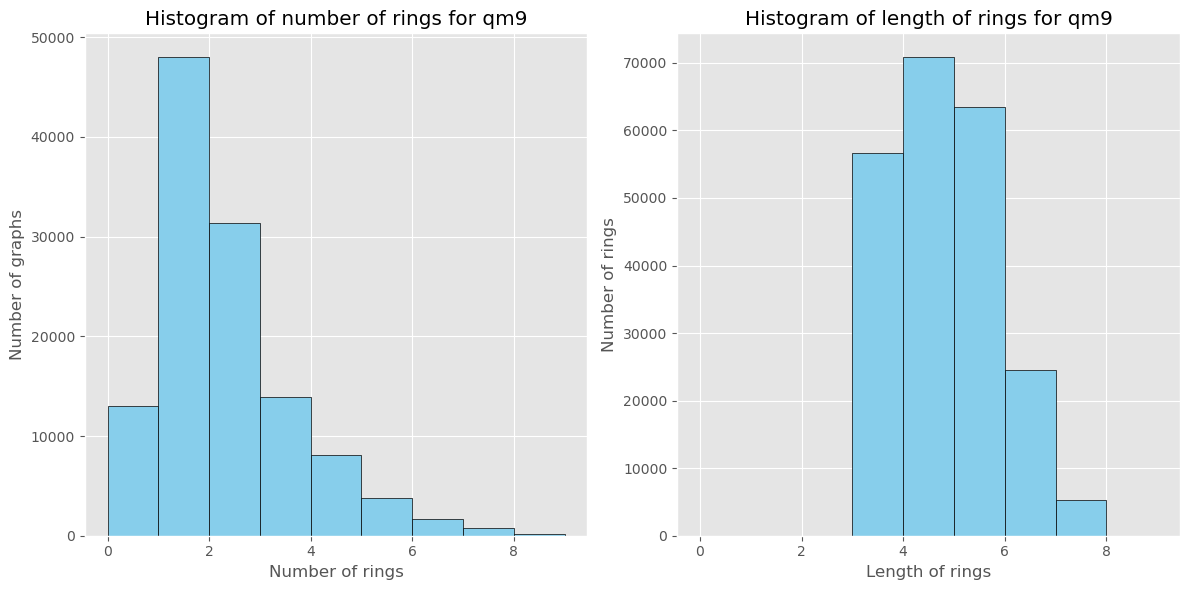

In [7]:
# plot histogram
import matplotlib.pyplot as plt
import numpy as np

# Use a style for the plot
plt.style.use('ggplot')

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first histogram with a color and edge color
axs[0].hist(qm9_rings_count, bins=np.arange(0, 10, 1), color='skyblue', edgecolor='black')
axs[0].set_xlabel('Number of rings')
axs[0].set_ylabel('Number of graphs')
axs[0].set_title('Histogram of number of rings for qm9')

# Plot the second histogram with a color and edge color
axs[1].hist(qm9_rings_len, bins=np.arange(0, 10, 1), color='skyblue', edgecolor='black')
axs[1].set_xlabel('Length of rings')
axs[1].set_ylabel('Number of rings')
axs[1].set_title('Histogram of length of rings for qm9')

plt.tight_layout()
plt.show()


## Create Cell Complexes with TopoModelX

We can choose following attributes for nodes: 
1. label: type of atom 
2. atomic_num
3. formal charge 
4. chiral_tag 
5. hybridization
6. num_explicit_hs 
7. is_aromatic 


In [18]:
from toponetx.classes.cell_complex import CellComplex

cell_complex = CellComplex(mol)
cell_complex.nodes(data=True)
print(cell_complex.get_node_attributes('label'))
print(cell_complex.get_node_attributes('atomic_num'))

{0: 'C', 1: 'N', 2: 'C', 3: 'C', 4: 'C', 5: 'C', 6: 'C', 7: 'O', 8: 'C'}
{0: 6, 1: 7, 2: 6, 3: 6, 4: 6, 5: 6, 6: 6, 7: 8, 8: 6}


In [29]:
# if we only consider label for now 
from utils.data_loader_mol import extract_node_feature_matrix_qm9

node_feature_matrix = extract_node_feature_matrix_qm9(cell_complex)
print(node_feature_matrix)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.]])


The label of edge determines single, double, and triple bonds.

In [23]:
from utils.data_loader_mol import extract_edge_features_qm9
print(cell_complex.get_edge_attributes('label'))

# extract edge features
edge_features = extract_edge_features_qm9(cell_complex)
print(edge_features)

{(0, 1): 1, (1, 2): 1, (1, 8): 1, (2, 3): 1, (2, 8): 1, (3, 4): 2, (4, 5): 1, (4, 6): 1, (6, 7): 2, (6, 8): 1}
tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])


# derive upper and lowe laplacian matrix for edges